In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import time

In [2]:
tickerSymbol = 'AAPL'
data = yf.Ticker(tickerSymbol)

In [3]:
prices = data.history(start='2019-01-01', end='2019-04-01').Close
returns = prices.pct_change().dropna()

In [16]:
print(type(prices))
prices

<class 'pandas.core.series.Series'>


Date
2019-01-02 00:00:00-05:00    38.105148
2019-01-03 00:00:00-05:00    34.309586
2019-01-04 00:00:00-05:00    35.774246
2019-01-07 00:00:00-05:00    35.694618
2019-01-08 00:00:00-05:00    36.375076
                               ...    
2019-03-25 00:00:00-04:00    45.737148
2019-03-26 00:00:00-04:00    45.264599
2019-03-27 00:00:00-04:00    45.671711
2019-03-28 00:00:00-04:00    45.732288
2019-03-29 00:00:00-04:00    46.030361
Name: Close, Length: 61, dtype: float64

Text(0, 0.5, 'Prices')

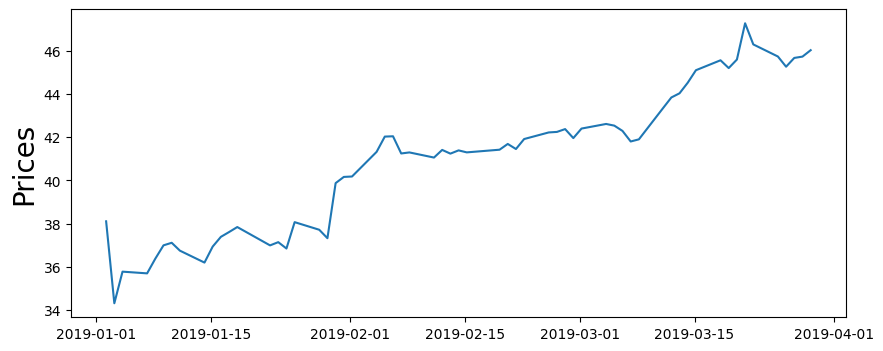

In [4]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Return')

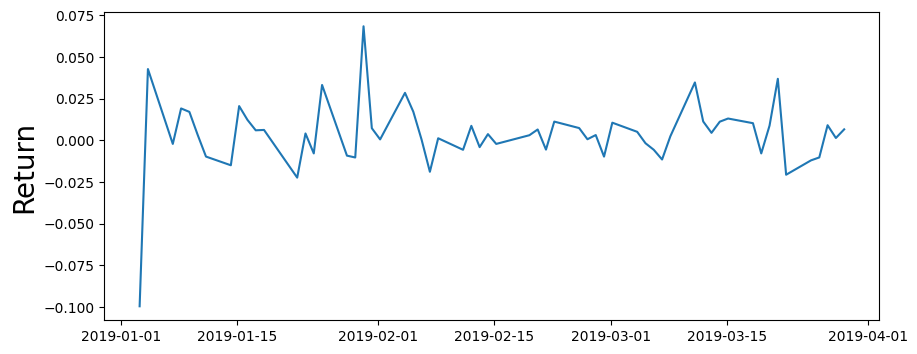

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


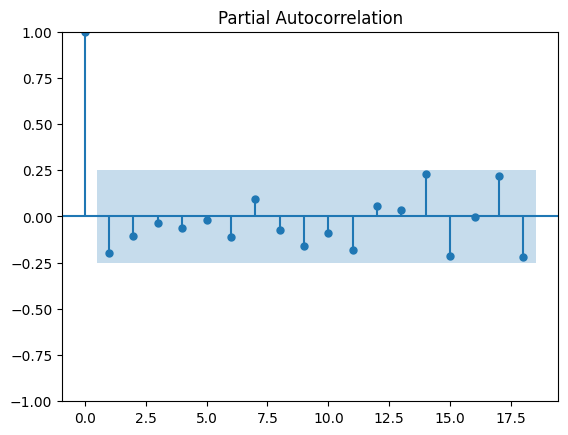

In [6]:
plot_pacf(returns)
plt.show()

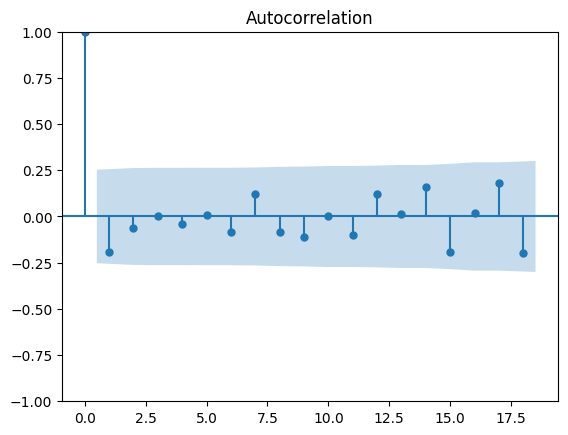

In [7]:
plot_acf(returns)
plt.show()

In [8]:
prediction_start = 21
prediction_end = 31
actual_data = returns[:prediction_end]

def predict(current_data, order):
    start_time = time.time_ns()
    for date, r in returns.iloc[prediction_start:prediction_end].items():
        model = ARIMA(current_data, order=order).fit()

        prediction = model.forecast()
        prediction_series = pd.Series(prediction.values, index=[date])
        current_data = current_data.append(prediction_series)
    
    elapsed_time = (time.time_ns() - start_time) / 1e6
    formatted_time = f"Execution time: {round(elapsed_time, 2)} [ms]"
    return current_data, formatted_time

def plot_prediction(current_data):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(actual_data, label="Actual data")
    ax.plot(prediction, label="prediction")
   # plt.axvline(x = prediction_start, color = 'g', label = 'extrapolation start')
    ax.set_xlabel("Date")
    ax.set_ylabel("Percentage price change")
    plt.show()
    
def calculate_rms(prediction):
    actual_data =  returns[prediction_start:prediction_end]
    print("RMS: %r " % round(np.sqrt(np.mean((prediction - actual_data) ** 2)), 3))

## AR(1)

In [9]:
current_data = returns[:prediction_start]
order = (1,0,0)

current_data, elapsed_time = predict(current_data, order)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

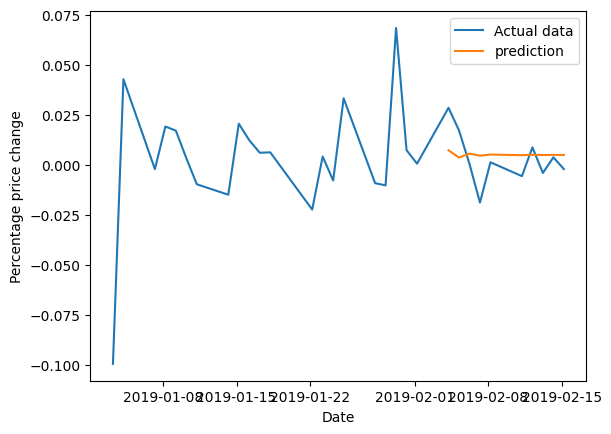

Execution time: 321.0 [ms]
RMS: 0.012 


In [10]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## AR(5)

In [11]:
current_data = returns[:prediction_start]
order = (5,0,0)

current_data, elapsed_time = predict(current_data, order)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

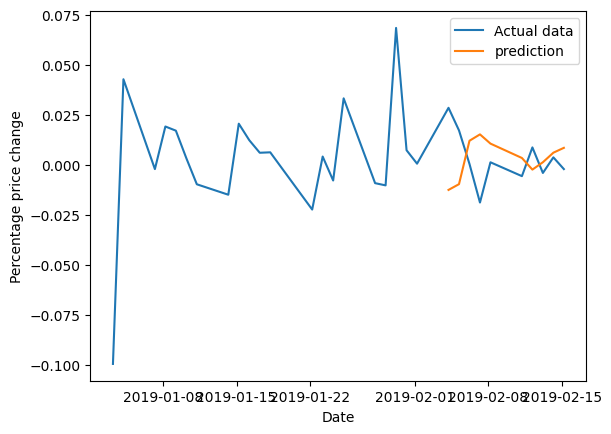

Execution time: 1061.48 [ms]
RMS: 0.02 


In [12]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## ARMA(5,5)

In [13]:
current_data = returns[:prediction_start]
order = (5,0,5)

current_data, elapsed_time = predict(current_data, order)

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

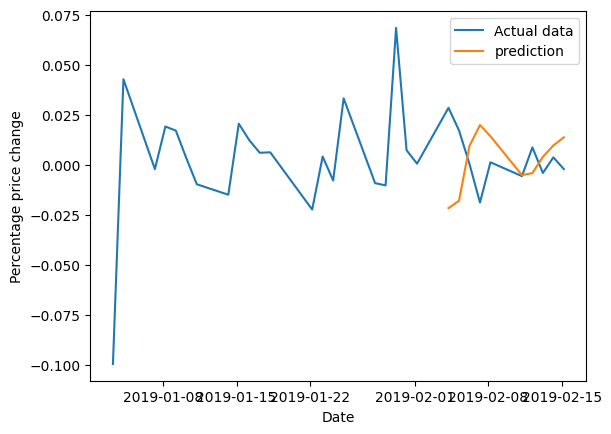

Execution time: 2033.89 [ms]
RMS: 0.025 


In [14]:
prediction = current_data[prediction_start:prediction_end]
plot_prediction(prediction)
print(elapsed_time)
calculate_rms(prediction)

## ARCH

In [18]:
#!pip install arch

from arch import arch_model
returns

Date
2019-01-03 00:00:00-05:00   -0.099607
2019-01-04 00:00:00-05:00    0.042689
2019-01-07 00:00:00-05:00   -0.002226
2019-01-08 00:00:00-05:00    0.019063
2019-01-09 00:00:00-05:00    0.016982
2019-01-10 00:00:00-05:00    0.003196
2019-01-11 00:00:00-05:00   -0.009818
2019-01-14 00:00:00-05:00   -0.015037
2019-01-15 00:00:00-05:00    0.020467
2019-01-16 00:00:00-05:00    0.012217
2019-01-17 00:00:00-05:00    0.005938
2019-01-18 00:00:00-05:00    0.006159
2019-01-22 00:00:00-05:00   -0.022446
2019-01-23 00:00:00-05:00    0.004045
2019-01-24 00:00:00-05:00   -0.007926
2019-01-25 00:00:00-05:00    0.033137
2019-01-28 00:00:00-05:00   -0.009254
2019-01-29 00:00:00-05:00   -0.010365
2019-01-30 00:00:00-05:00    0.068335
2019-01-31 00:00:00-05:00    0.007201
2019-02-01 00:00:00-05:00    0.000481
2019-02-04 00:00:00-05:00    0.028405
2019-02-05 00:00:00-05:00    0.017109
2019-02-06 00:00:00-05:00    0.000345
2019-02-07 00:00:00-05:00   -0.018939
2019-02-08 00:00:00-05:00    0.001175
2019-02

In [19]:
# a standard GARCH(1,1) model
garch = arch_model(returns, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

# one-step out-of sample forecast
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8033181.754453839
Iteration:      2,   Func. Count:     16,   Neg. LLF: -155.5955226861779
Optimization terminated successfully    (Exit mode 0)
            Current function value: -155.59552304819584
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
